In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/ODIMatchResults_Inn.csv')
df.head()

team1  runs  Inn  overs   rpo         Date result        team2  \
0    Australia   240    1   50.0  4.80   6 Jan 1985   lost  West Indies   
1  West Indies   241    2   44.5  5.37   6 Jan 1985    won    Australia   
2    Sri Lanka   239    1   49.0  4.87   8 Jan 1985   lost    Australia   
3    Australia   240    2   46.2  5.17   8 Jan 1985    won    Sri Lanka   
4    Sri Lanka   197    1   50.0  3.94  10 Jan 1985   lost  West Indies   

      Ground  
0  Melbourne  
1  Melbourne  
2     Sydney  
3     Sydney  
4     Hobart

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team1   7602 non-null   object 
 1   runs    7602 non-null   int64  
 2   Inn     7602 non-null   int64  
 3   overs   7602 non-null   float64
 4   rpo     7602 non-null   float64
 5   Date    7602 non-null   object 
 6   result  7602 non-null   object 
 7   team2   7602 non-null   object 
 8   Ground  7602 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 534.6+ KB


In [4]:
df.dtypes

team1      object
runs        int64
Inn         int64
overs     float64
rpo       float64
Date       object
result     object
team2      object
Ground     object
dtype: object

In [5]:
df.isnull().sum()

team1     0
runs      0
Inn       0
overs     0
rpo       0
Date      0
result    0
team2     0
Ground    0
dtype: int64

In [6]:
df.describe()

runs          Inn        overs          rpo
count  7602.000000  7602.000000  7602.000000  7602.000000
mean    219.877927     1.500000    44.785057     4.905963
std      60.789866     0.500033     7.718425     1.096836
min      35.000000     1.000000     4.200000     1.680000
25%     179.000000     1.000000    42.400000     4.160000
50%     221.000000     1.500000    48.300000     4.850000
75%     259.000000     2.000000    50.000000     5.560000
max     481.000000     2.000000    55.000000    15.830000

In [7]:
df.corr()

runs       Inn     overs       rpo
runs   1.000000 -0.279765  0.647188  0.700214
Inn   -0.279765  1.000000 -0.384142 -0.023092
overs  0.647188 -0.384142  1.000000 -0.049881
rpo    0.700214 -0.023092 -0.049881  1.000000

In [8]:
df.describe().corr()

runs       Inn     overs       rpo
runs   1.000000  0.998654  0.998938  0.998728
Inn    0.998654  1.000000  0.999975  0.999999
overs  0.998938  0.999975  1.000000  0.999981
rpo    0.998728  0.999999  0.999981  1.000000

In [9]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


runs     219.877927
Inn        1.500000
overs     44.785057
rpo        4.905963
dtype: float64

In [10]:
df.min()

team1     Afghanistan
runs               35
Inn                 1
overs             4.2
rpo              1.68
Date       1 Apr 1988
result           lost
team2     Afghanistan
Ground       Aberdeen
dtype: object

In [11]:
df.max()

team1       Zimbabwe
runs             481
Inn                2
overs           55.0
rpo            15.83
Date      9 Sep 2011
result           won
team2       Zimbabwe
Ground     Worcester
dtype: object

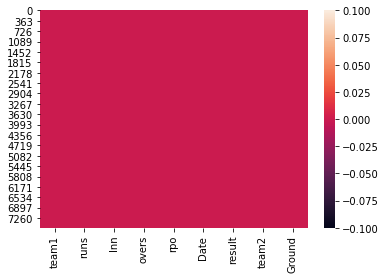

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.head()

team1  runs  Inn  overs   rpo         Date result        team2  \
0    Australia   240    1   50.0  4.80   6 Jan 1985   lost  West Indies   
1  West Indies   241    2   44.5  5.37   6 Jan 1985    won    Australia   
2    Sri Lanka   239    1   49.0  4.87   8 Jan 1985   lost    Australia   
3    Australia   240    2   46.2  5.17   8 Jan 1985    won    Sri Lanka   
4    Sri Lanka   197    1   50.0  3.94  10 Jan 1985   lost  West Indies   

      Ground  
0  Melbourne  
1  Melbourne  
2     Sydney  
3     Sydney  
4     Hobart

In [15]:
df['Year'] = df['Date'].apply(lambda date : date.split(" ")[2])
df['Month']  = df['Date'].apply(lambda date : date.split(" ")[1])
df.drop('Date',axis=1,inplace=True)

In [16]:
df.head()

team1  runs  Inn  overs   rpo result        team2     Ground  Year  \
0    Australia   240    1   50.0  4.80   lost  West Indies  Melbourne  1985   
1  West Indies   241    2   44.5  5.37    won    Australia  Melbourne  1985   
2    Sri Lanka   239    1   49.0  4.87   lost    Australia     Sydney  1985   
3    Australia   240    2   46.2  5.17    won    Sri Lanka     Sydney  1985   
4    Sri Lanka   197    1   50.0  3.94   lost  West Indies     Hobart  1985   

  Month  
0   Jan  
1   Jan  
2   Jan  
3   Jan  
4   Jan

In [17]:
ind_aus = df[((df['team1'] == 'Australia')&(df['team2']== 'India'))|((df['team2'] == 'Australia')&(df['team1']== 'India'))]
ind_aus

team1  runs  Inn  overs   rpo result      team2     Ground  Year  \
62    Australia   163    1   49.3  3.29   lost      India  Melbourne  1985   
63        India   165    2   36.1  4.56    won  Australia  Melbourne  1985   
82    Australia   139    1   42.3  3.27   lost      India    Sharjah  1985   
83        India   140    2   39.2  3.55    won  Australia    Sharjah  1985   
126       India   161    1   43.0  3.74   lost  Australia   Brisbane  1986   
...         ...   ...  ...    ...   ...    ...        ...        ...   ...   
7555  Australia   258    2   37.4  6.84    won      India     Mumbai  2020   
7556      India   340    1   50.0  6.80    won  Australia     Rajkot  2020   
7557  Australia   304    2   49.1  6.18   lost      India     Rajkot  2020   
7558  Australia   286    1   50.0  5.72   lost      India  Bengaluru  2020   
7559      India   289    2   47.3  6.08    won  Australia  Bengaluru  2020   

     Month  
62     Mar  
63     Mar  
82     Mar  
83     Mar  
126    Jan  
...    ...  
7555   Jan  
7556   Jan  
7557   Jan  
7558   Jan  
7559   Jan  

[240 rows x 10 columns]

In [18]:
ind_df = ind_aus[ind_aus['team1']=='India']
aus_df = ind_aus[ind_aus['team1']=='Australia']

In [19]:
ind_aus_inn1 = ind_aus[ind_aus['Inn']==1]
ind_aus_chase = ind_aus[ind_aus['Inn']==2]

In [20]:
ind_df_1st = ind_df[ind_df['Inn']==1]
ind_df_2nd = ind_df[ind_df['Inn']==2]
aus_df_1st = aus_df[aus_df['Inn']==1]
aus_df_2nd = aus_df[aus_df['Inn']==2]

In [22]:
import plotly.express as px

In [23]:
px.histogram(ind_df_1st['runs'],labels = {'value' : 'India : Runs scored batting 1st'},nbins=30) # color of histogram bars)

In [26]:
px.histogram(aus_df_1st['runs'],labels = {'value' : 'Australia : Runs scored batting 1st'},nbins=30,color_discrete_sequence=['indianred']) # color of histogram bars)

In [27]:
px.histogram(ind_df_2nd['runs'],labels = {'value' :'Inda : Runs scored batting 2nd'},nbins=30, ) # color of histogram bars)

In [28]:
px.histogram(aus_df_2nd['runs'],labels = {'value' :'Australia : Runs scored batting 2nd'},nbins=30, color_discrete_sequence=['indianred']) # color of histogram bars)

Text(0, 0.5, 'Runs scored in the 1st innings')

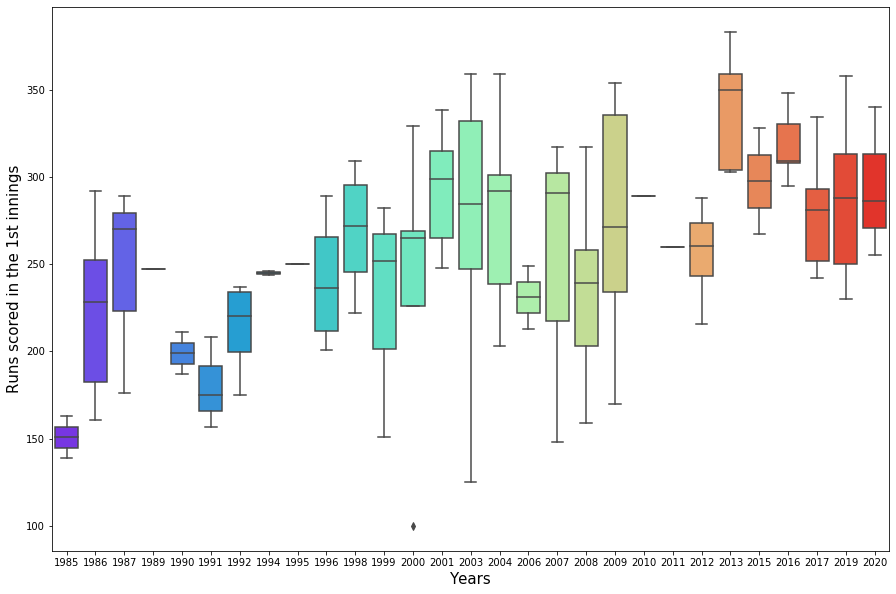

In [32]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'Year',y = 'runs',data=ind_aus_inn1,palette = 'rainbow');
ax.set_xlabel('Years',fontsize = 15)
ax.set_ylabel('Runs scored in the 1st innings',fontsize=15)

Text(0, 0.5, 'Runs scored while chasing')

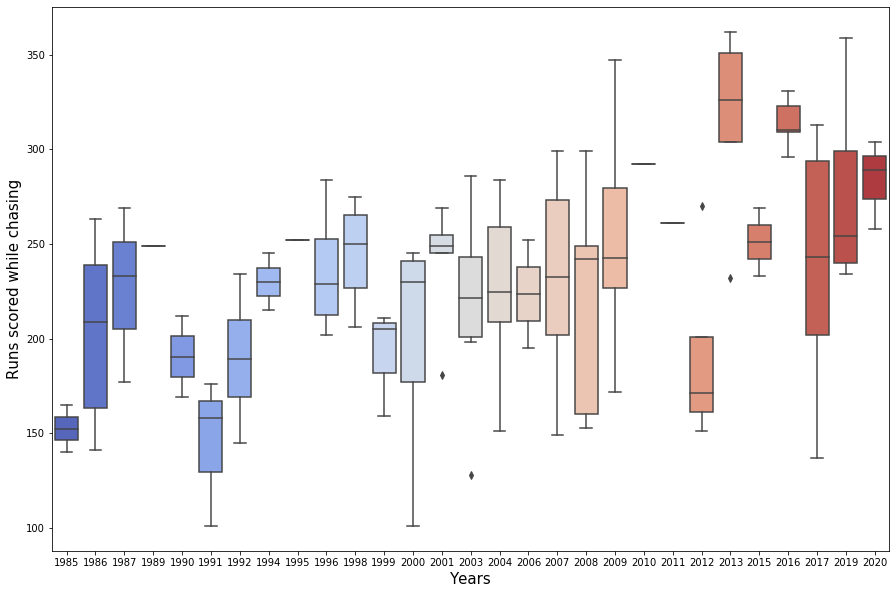

In [33]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'Year',y = 'runs',data=ind_aus_chase,palette = 'coolwarm');
ax.set_xlabel('Years',fontsize = 15)
ax.set_ylabel('Runs scored while chasing',fontsize=15)

Text(0, 0.5, 'Count')

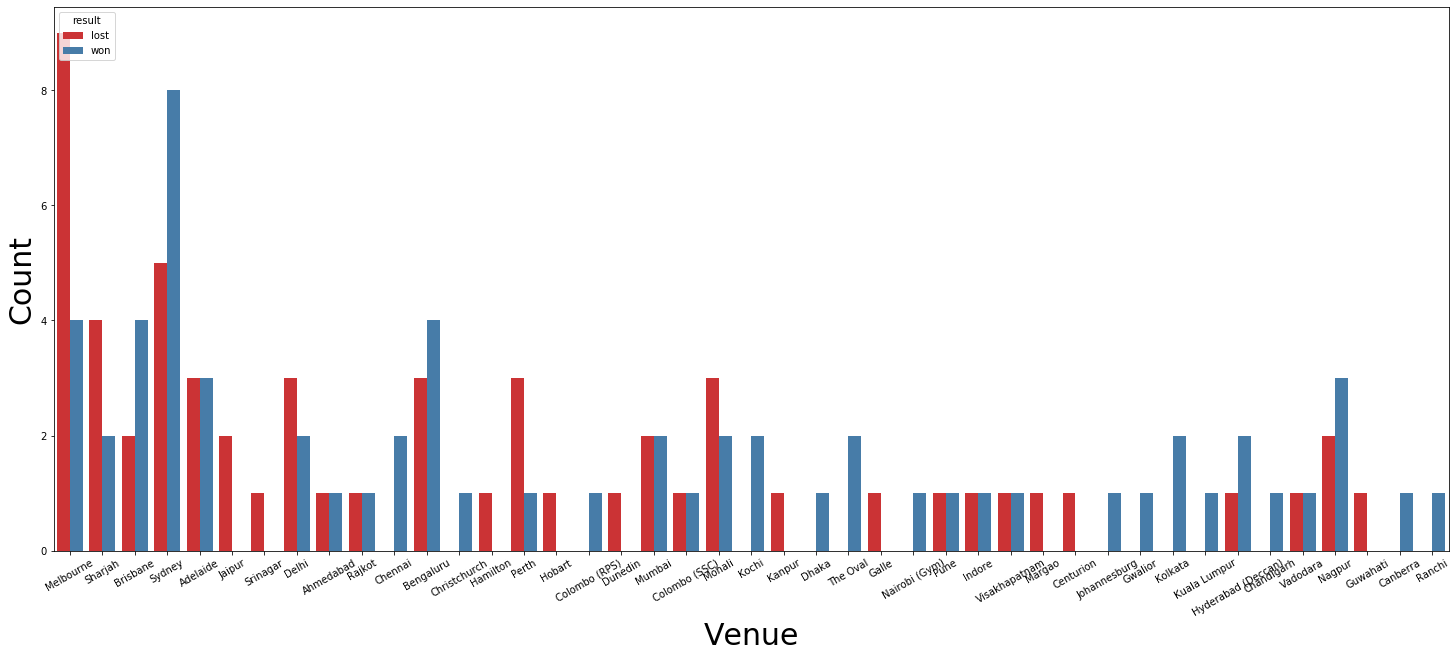

In [34]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 30)
sns.countplot('Ground',hue = 'result',data = ind_aus_inn1,palette = 'Set1' )
plt.xlabel('Venue',fontsize = 30)
plt.ylabel('Count',fontsize = 30)

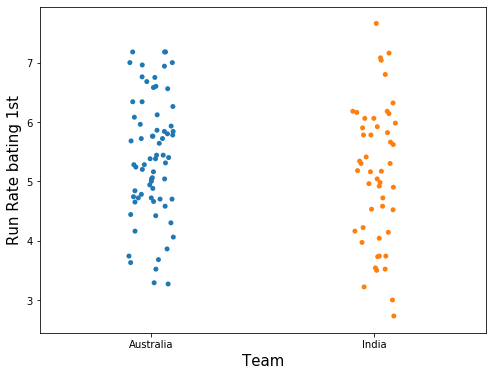

In [35]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'team1',y = 'rpo',data = ind_aus_inn1);
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Run Rate bating 1st',fontsize = 15) ;

Text(0, 0.5, 'Run Rate batting 2nd')

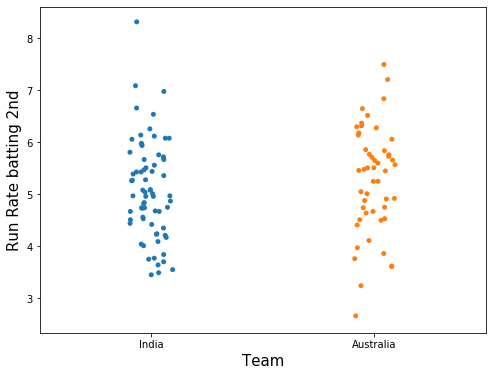

In [37]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'team1',y = 'rpo',data = ind_aus_chase);
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Run Rate batting 2nd',fontsize = 15)

In [38]:
fig = px.pie(ind_df_1st,values = 'Inn',names = 'result')
fig.show()

In [41]:
fig = px.pie(ind_df_2nd,values = 'Inn',names = 'result')
fig.show()

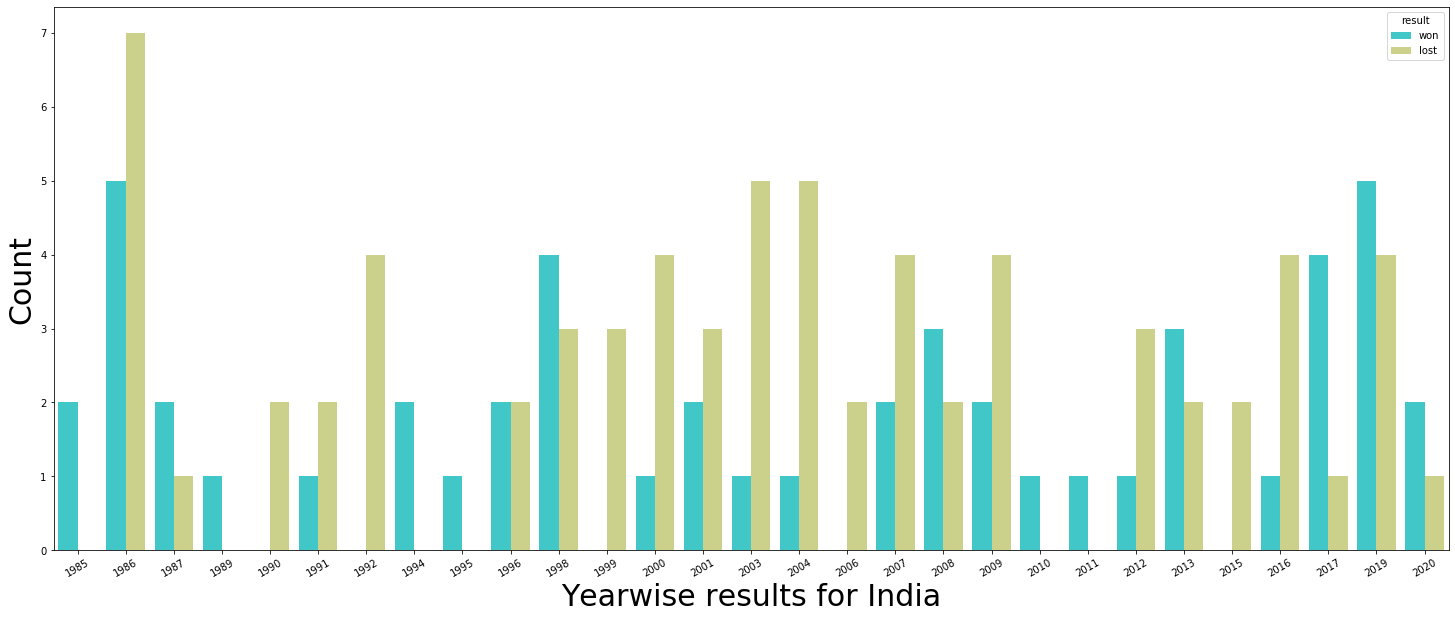

In [42]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 30)
sns.countplot('Year',hue = 'result',data = ind_df,palette = 'rainbow' )
plt.xlabel('Yearwise results for India',fontsize = 30)
plt.ylabel('Count',fontsize = 30);

In [44]:
ind_aus['Year'] = ind_aus['Year'].astype('int')
last_5_year = ind_aus[ind_aus['Year']>=2015]

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
match_1_2 = last_5_year[last_5_year['Ground']=='Sydney']
match_1_2

team1  runs  Inn  overs   rpo result      team2  Ground  Year Month
6438  Australia   328    1   50.0  6.56    won      India  Sydney  2015   Mar
6439      India   233    2   46.5  4.97   lost  Australia  Sydney  2015   Mar
6596  Australia   330    1   50.0  6.60   lost      India  Sydney  2016   Jan
6597      India   331    2   49.4  6.66    won  Australia  Sydney  2016   Jan
7258  Australia   288    1   50.0  5.76    won      India  Sydney  2019   Jan
7259      India   254    2   50.0  5.08   lost  Australia  Sydney  2019   Jan

In [46]:
match_1_2[(match_1_2['result']=='won')&(match_1_2['Inn']==1)]['runs'].mean()

308.0

In [47]:
match_1_2[(match_1_2['result']=='won')&(match_1_2['Inn']==2)]['runs'].mean()

331.0

In [49]:
df.head()

team1  runs  Inn  overs   rpo result        team2     Ground  Year  \
0    Australia   240    1   50.0  4.80   lost  West Indies  Melbourne  1985   
1  West Indies   241    2   44.5  5.37    won    Australia  Melbourne  1985   
2    Sri Lanka   239    1   49.0  4.87   lost    Australia     Sydney  1985   
3    Australia   240    2   46.2  5.17    won    Sri Lanka     Sydney  1985   
4    Sri Lanka   197    1   50.0  3.94   lost  West Indies     Hobart  1985   

  Month  
0   Jan  
1   Jan  
2   Jan  
3   Jan  
4   Jan

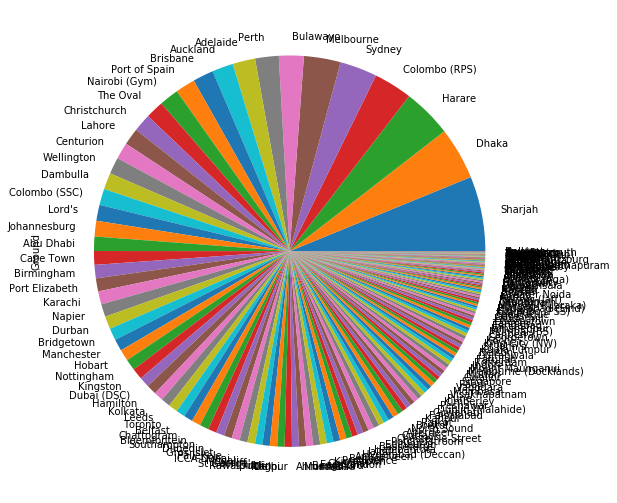

In [51]:
plt.figure(figsize = (15,9))
plt.xticks(rotation = 30)
df.Ground.value_counts().plot(kind='pie')

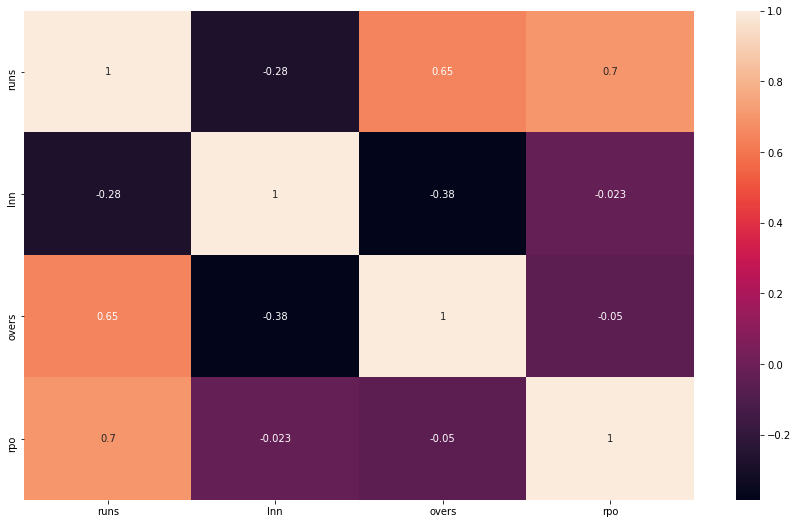

In [52]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

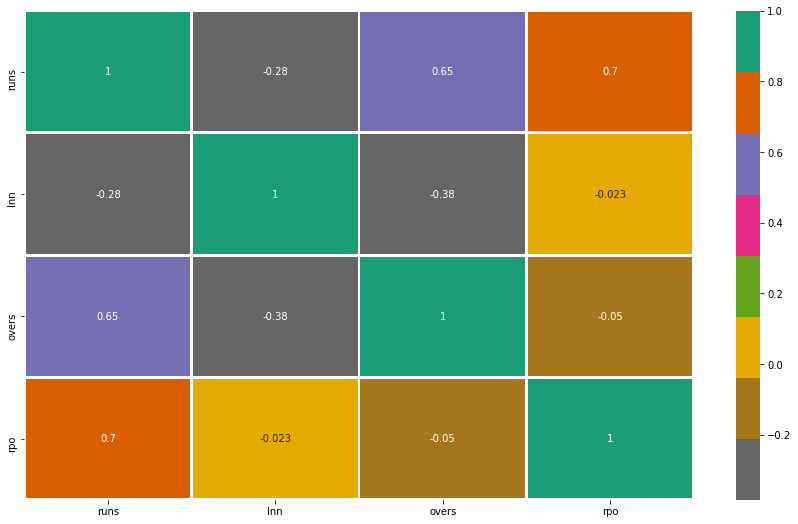

In [53]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

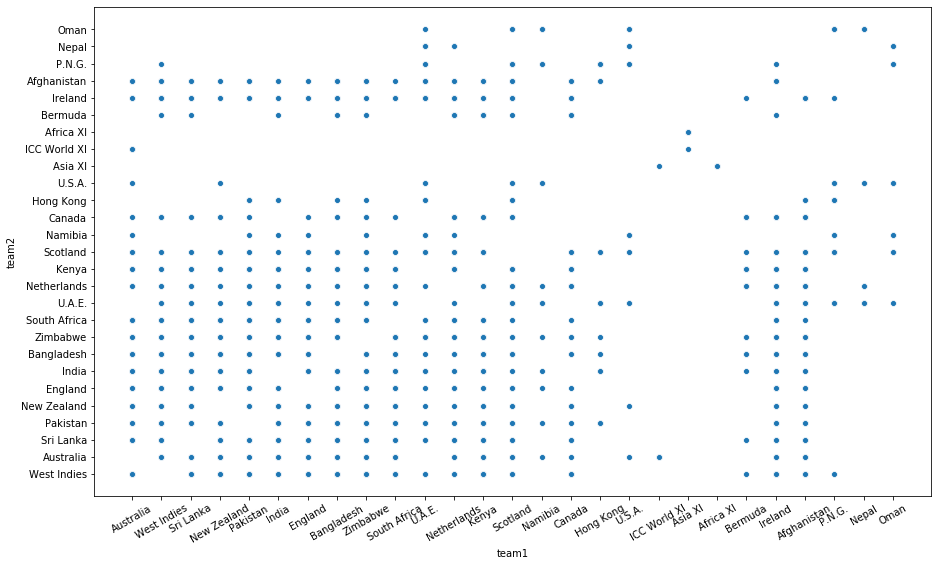

In [56]:
plt.figure(figsize=(15,9))
plt.xticks(rotation = 30)
sns.scatterplot(x='team1',y='team2',data=df)

In [57]:
df.columns

Index(['team1', 'runs', 'Inn', 'overs', 'rpo', 'result', 'team2', 'Ground',
       'Year', 'Month'],
      dtype='object')

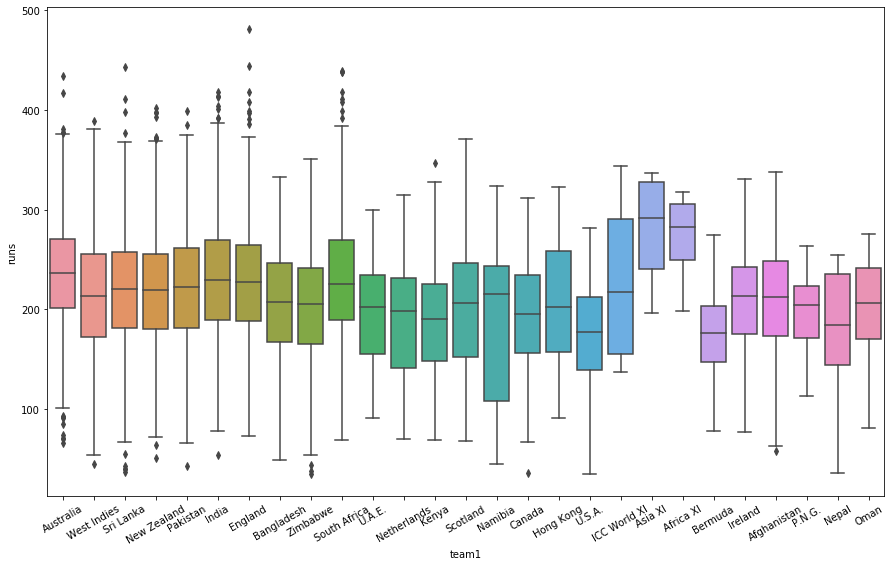

In [58]:
plt.figure(figsize=(15,9))
plt.xticks(rotation = 30)
sns.boxplot(x='team1',y='runs',data=df)

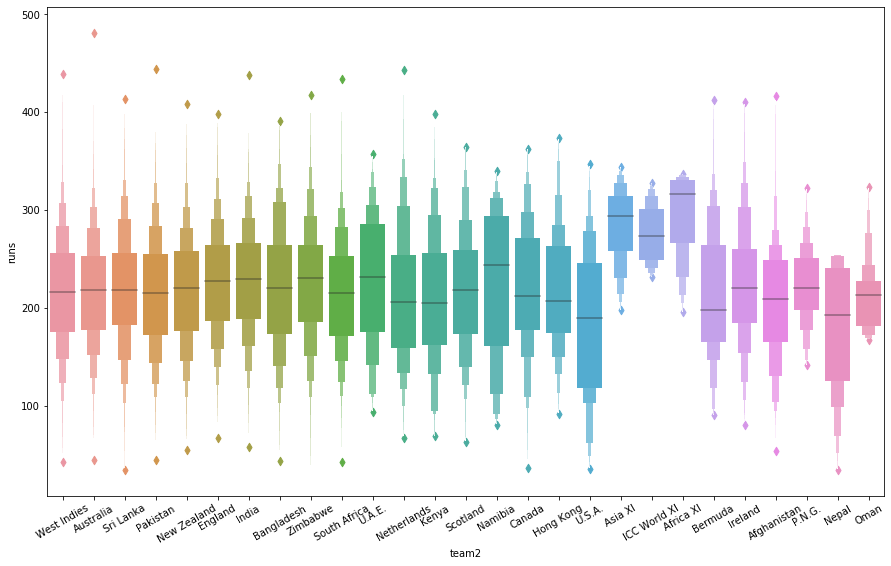

In [59]:
plt.figure(figsize=(15,9))
plt.xticks(rotation = 30)
sns.boxenplot(x='team2',y='runs',data=df)

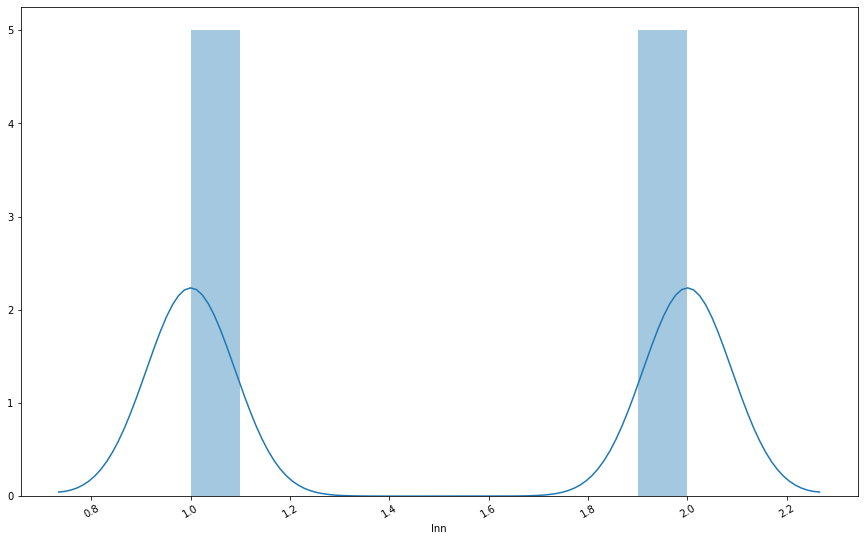

In [63]:
plt.figure(figsize=(15,9))
plt.xticks(rotation = 30)
sns.distplot(df['Inn'])

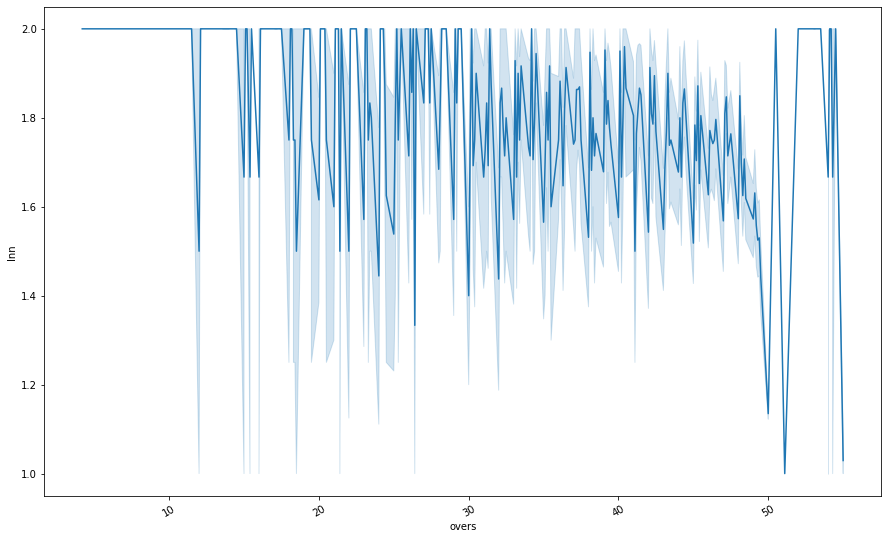

In [65]:
plt.figure(figsize=(15,9))
plt.xticks(rotation = 30)
sns.lineplot(x='overs',y='Inn',data=df)

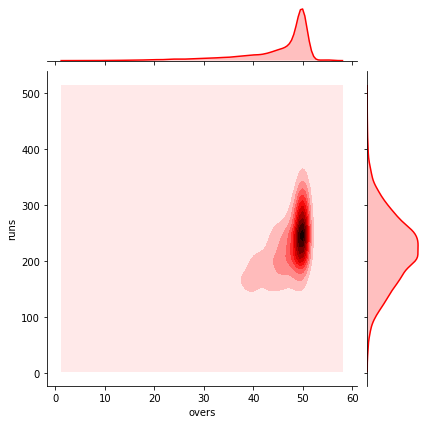

In [68]:
sns.jointplot(x='overs',y='runs',data=df,kind='kde',color='red')

In [69]:
df.columns

Index(['team1', 'runs', 'Inn', 'overs', 'rpo', 'result', 'team2', 'Ground',
       'Year', 'Month'],
      dtype='object')

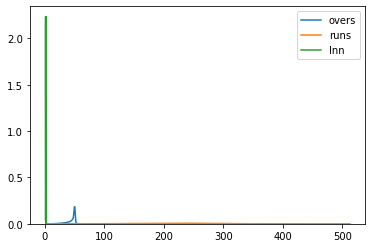

In [71]:
sns.kdeplot(df['overs'])
sns.kdeplot(df['runs'])
sns.kdeplot(df['Inn'])

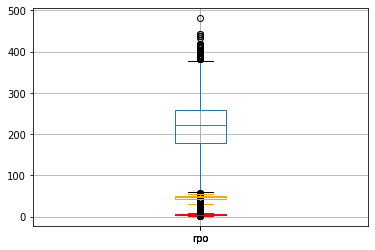

In [74]:
df.boxplot(column="runs")
df.boxplot(column="overs",color='orange')
df.boxplot(column="rpo",color='red')

In [75]:
import sweetviz as sv

In [76]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [77]:
from IPython.display import IFrame

In [78]:
IFrame(src='Analyze.html',width=1000,height=600)

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
man=MinMaxScaler()
feat=['team1', 'runs', 'Inn', 'overs', 'rpo', 'result', 'team2', 'Ground',
       'Year', 'Month']
df[feat]=man